In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.target.unique()

array([1, 0], dtype=int64)

<Axes: xlabel='target', ylabel='count'>

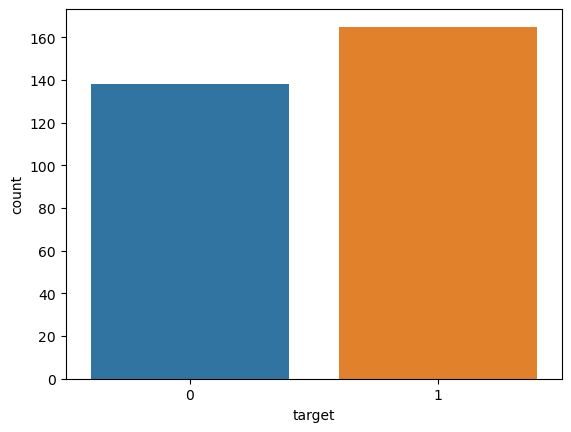

In [8]:
sns.countplot(data=df,x='target')

C:\Users\GREESHMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


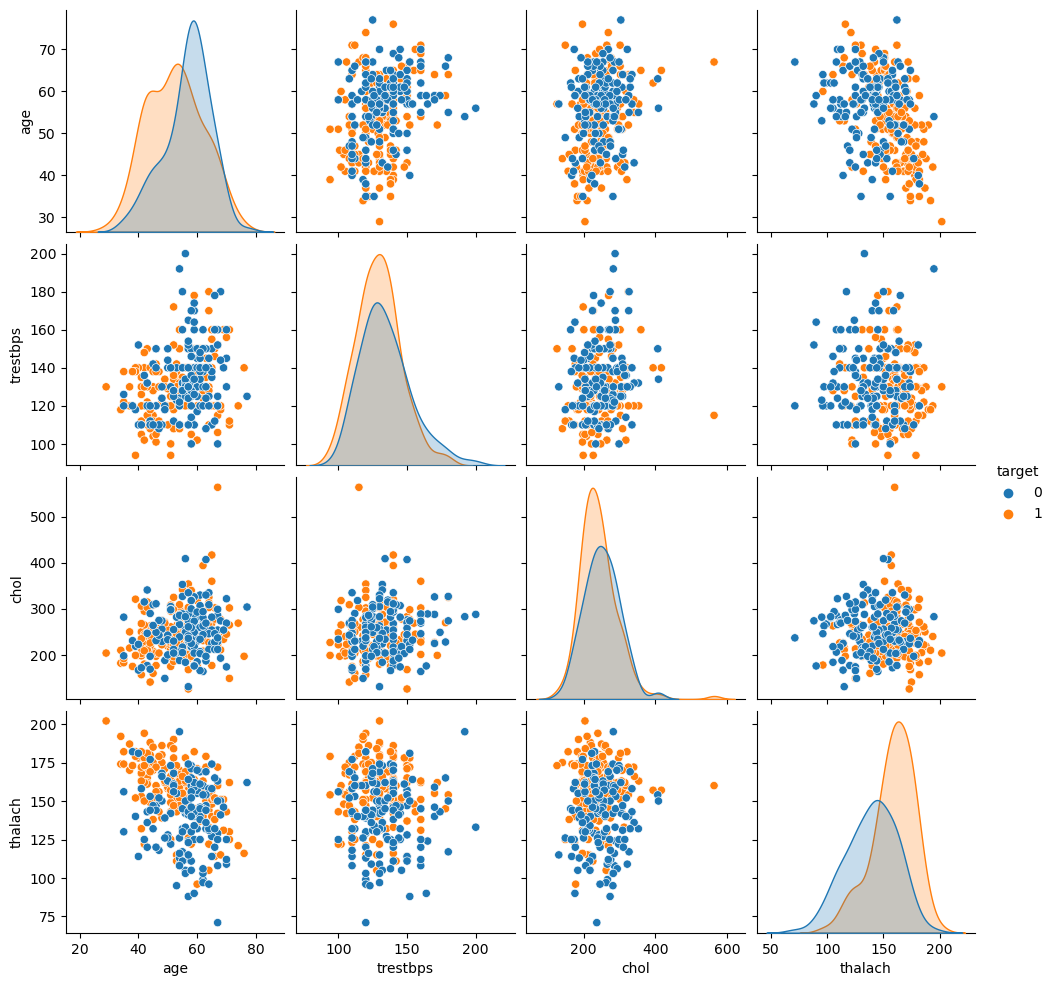

In [10]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

<Axes: >

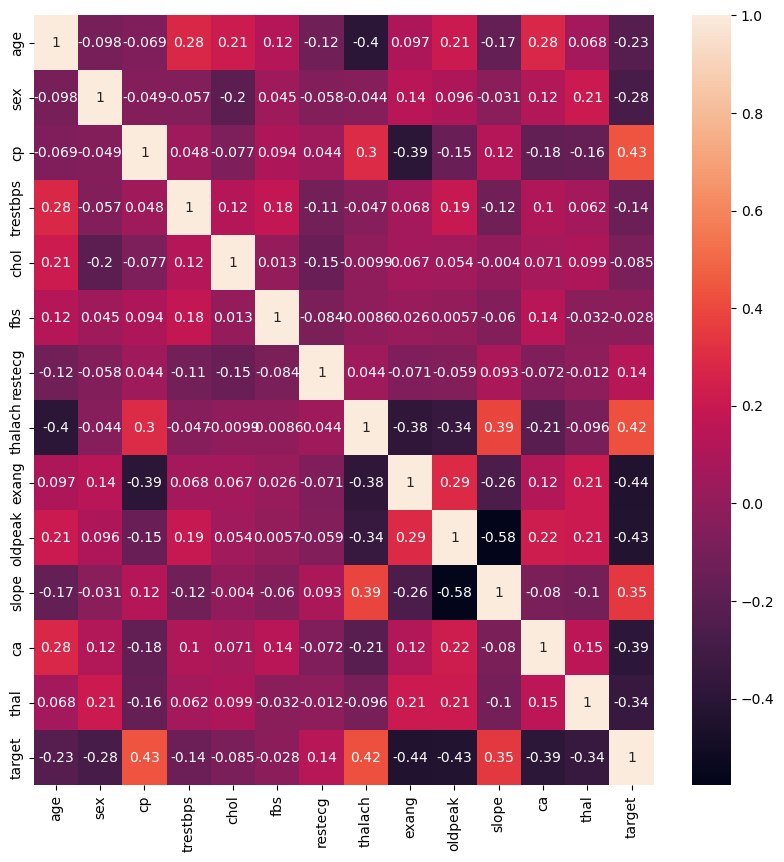

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [15]:
X=df.drop('target',axis=1)

In [16]:
y=df['target']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
scaled_X_train=scaler.fit_transform(X_train)

In [22]:
scaled_X_test=scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegressionCV

In [24]:
log_model=LogisticRegressionCV()

In [27]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [28]:
log_model.C_

array([0.04641589])

In [29]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [30]:
log_model.coef_

array([[-0.04434304, -0.37893376,  0.47827919, -0.17708478, -0.1276238 ,
         0.02149307,  0.14856221,  0.28597233, -0.41391113, -0.35894321,
         0.2311706 , -0.47307124, -0.36816439]])

In [32]:
coefs=pd.Series(index=X.columns,data=log_model.coef_[0])

In [33]:
coefs=coefs.sort_values()

<Axes: >

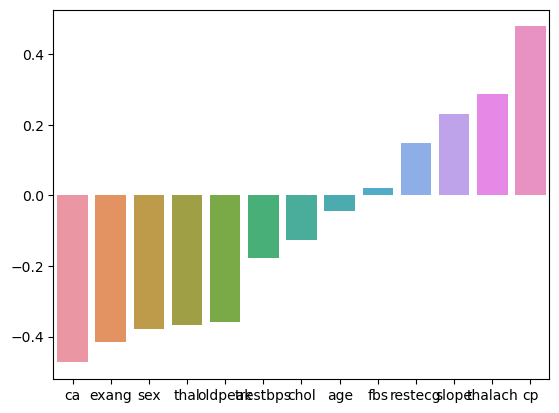

In [34]:
sns.barplot(x=coefs.index,y=coefs.values)

In [35]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [36]:
preds=log_model.predict(scaled_X_test)

In [37]:
confusion_matrix(y_test,preds)

array([[ 9,  5],
       [ 0, 17]], dtype=int64)

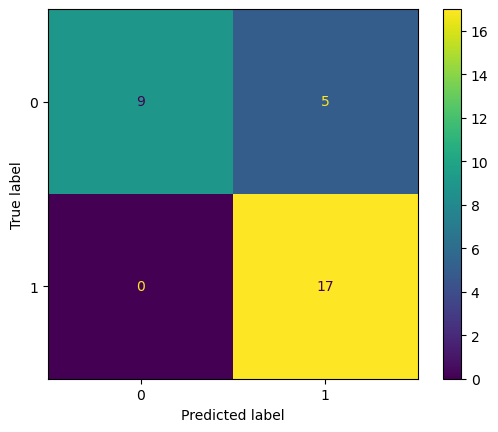

In [41]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

In [42]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.77      1.00      0.87        17

    accuracy                           0.84        31
   macro avg       0.89      0.82      0.83        31
weighted avg       0.88      0.84      0.83        31



In [43]:
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay

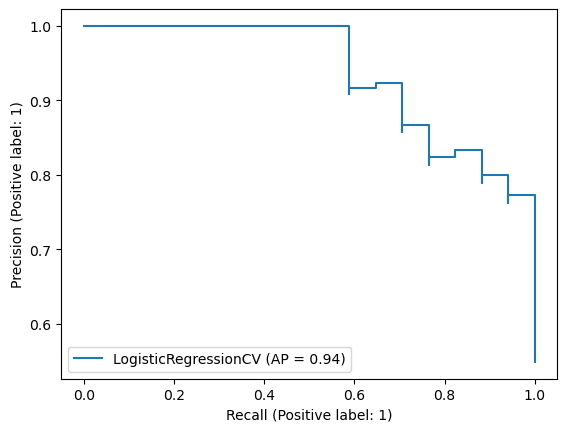

In [46]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test)

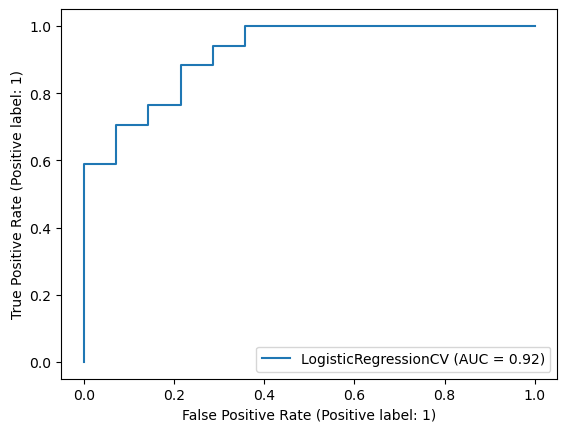

In [48]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)

In [51]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [52]:
log_model.predict(patient)

array([0], dtype=int64)

In [53]:
log_model.predict_proba(patient)

array([[1.0000000e+00, 5.4860519e-14]])